In [1]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
def myMonteCarlo(myParams,a,N):
    
    bolyongas = [[]for _ in range(len(myParams))] #listák listája a tárolásra
    n0=a
    n=a
    for i in range(len(myParams)):
        nu=myParams[i] #aktuális személyre szabott érték beállítása
        j =0
        while j<N: #j=0,1,2,...N-1
            sorsolas=(random.randint(0,1)*2)-1 #egész szám (1 vagy -1) sorsolása
                                                   #egyenletes eloszlás alapján

            if sorsolas>0:
                n0=n
                n+=1
                if 0.5*((n**2)-(n0**2))<0:
                    bolyongas[i].append(n)
                else:
                    P=random.random()
                    myExpVal=exp(-0.5*nu*((n**2)-(n0**2)))
                    if P <myExpVal:
                        bolyongas[i].append(n)
                    else:
                        bolyongas[i].append(n0)


            else:
                n0=n
                n-=1
                if 0.5*((n**2)-(n0**2))<0:
                    bolyongas[i].append(n)
                else:
                    P=random.random()
                    myExpVal=exp(-0.5*nu*((n**2)-(n0**2)))
                    if P <myExpVal:
                        bolyongas[i].append(n)

                    else:
                        bolyongas[i].append(n0) 
            
            j+=1
            
    return bolyongas

In [3]:
myParams = [0.07,0.16,0.64,0.90]

In [4]:
a=500
N = 1e05

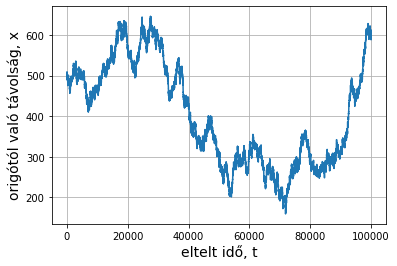

In [5]:
mySimulation =myMonteCarlo(myParams,a,N)
plot(mySimulation[0])
grid()
xlabel('eltelt idő, t', fontsize=14)
ylabel('origótól való távolság, x', fontsize=14)
savefig('test1.png')

#### A $\beta k a^{2}$ személyre szabott paraméterekhez tartozó $\tau$ értékek megbecslése 

In [6]:
myTaus = []

for i in range(4):
    myTaus.append(argmin(array([mySimulation[i]])))
        
myTaus

[71882, 97802, 15859, 56189]

#### A $T$ hőmérsékleti termodinamikai átlagok $<x>$ és $<x^{2}>$ kiszámítása

In [ ]:
myXs = [[]for _ in range(4)]
myXSquares = [[]for _ in range(4)]

for i in range(4):
    for j in range(mySimulation[i][myTaus[i]],len(mySimulation[i])):
        if j%5==0:
            myXs[i].append(array([mySimulation[i][j]]))
            myXSquares[i].append(array([mySimulation[i][j]**2]))

In [30]:
myEXs = []

for i in range(4):
    for j in range(len(myXs[i])):
        myEXs.append(array([myXs[i]]).mean())
        
    
myEXs

KeyboardInterrupt: 

In [ ]:
myEXSquares = []

for i in range(4):
    for j in range(len(myXSquares[i])):
        myEXSquares.append(array([myXSquares[i]]).mean())
        
    
myEXSquares

#### A $<x^{2}>-<x>^{2}$ szórásnégyzet kiszámítása

In [24]:
output = []

for i in range(4):
    output.append(myEXSquares[i]-myEX[i]**2)

36705.734231762355

In [ ]:
output

In [40]:
a = 666
myMeansSquared= []
myMeanSquares= []
myVariances = []

for i in range(4):
    myMeansSquared.append((a*array([mySimulation[i]]).mean())**2)
    myMeanSquares.append(a**2*array([[l**2 for l in mySimulation[i]]]).mean())
    myVariances.append(myMeanSquares[i]-myMeansSquared[i])
    
myVariances

[1888840869.9720764, 3403046591.414795, 4982511639.538452, 5570760760.097412]

Text(0, 0.5, '$\\sigma^{2}$')

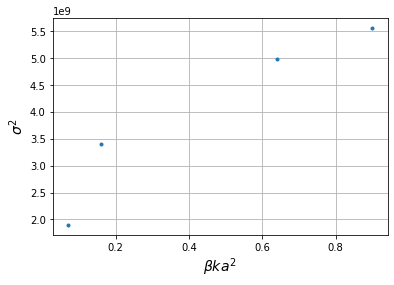

In [41]:
plot(myParams,myVariances,'.')
grid()
xlabel(r'$\beta k a^{2}$', fontsize=14)
ylabel(r'$\sigma^{2}$', fontsize=14)